In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from tqdm import tqdm

import ema_workbench
from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, Scenario, Constraint)

from functions_data import full_dataframe

## 1. Loading the dataset

In [2]:
n_scenarios = 10
seed = 1

scenarios_data = pd.read_csv(f"data/drought_scenarios_{n_scenarios} - seed{seed}.csv")
scenarios_data.head()

,calderon_lared_flow,chapala_flow,pozos_flow,toluquilla_flow,scenario,policy,model
0,2.566455,6.049146,2.705694,0.104075,43660,None,AMGmodel
1,0.869929,5.769992,1.646554,0.052168,87278,None,AMGmodel
2,0.148936,5.622035,2.868847,0.279797,14317,None,AMGmodel
3,0.403608,5.588388,0.732086,0.040383,81932,None,AMGmodel
4,0.985463,3.837839,2.387142,0.363201,95321,None,AMGmodel


c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


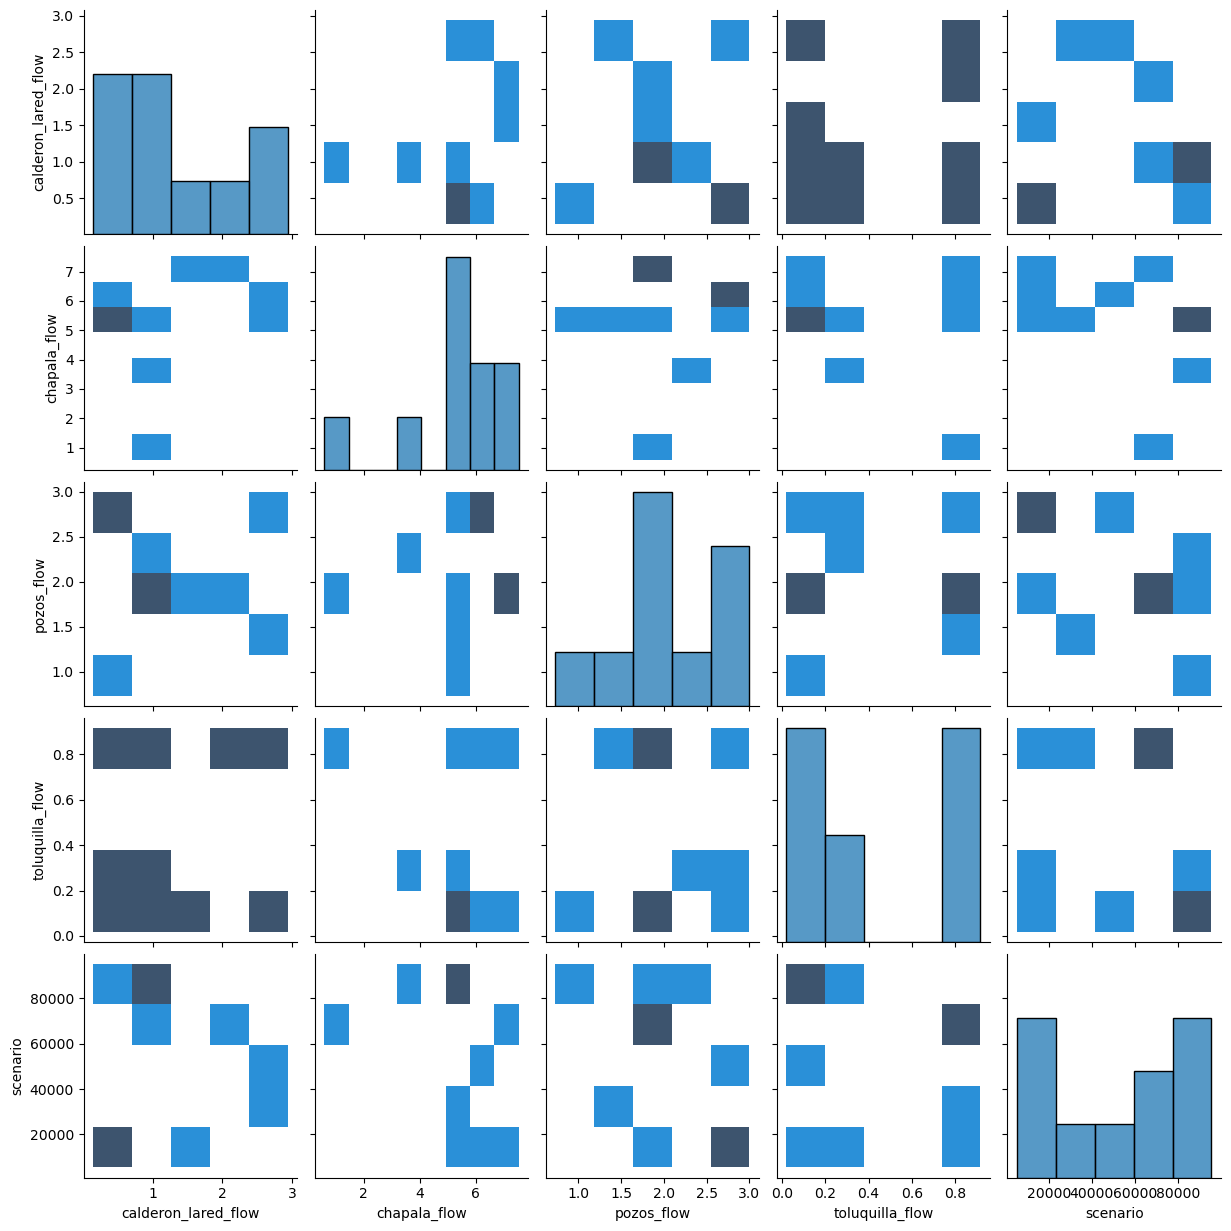

In [3]:
sns.pairplot(scenarios_data, kind="hist")

## 2. Performing the experiments

In [4]:
from AMG_optimization import run_optimization
from AMG_function import AMG_model_function
from functions_data import full_dataframe_from_df

# Problem formulation
performance_outcomes = {"supplied_demand_deficit":False,
                          "supplied_demand":False,
                          "supply_percapita":False}

other_outcomes = {"energy_costs":False}


# Optimization Parameters
n_nfe = 1000
epsilon = 0.8
seed = 1

# Remove columns not used by the AMG model as input for the sources' flows (scenarios)
scenarios_df = scenarios_data.drop(columns=["policy", "model"])

# Define which indicators are going to be optimized for
indicators = ["ZAs_below_100"]

for indicator in indicators:

    # Deactivate all other indicators
    justice_outcomes = {"supplied_demand_GINI":False,
                      "supply_percapita_GINI":False,
                      "average_supply_percapita":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}
    
    # Activate the minimization of ZA under each threshold
    justice_outcomes[indicator]=True

    experiment_name = f"{indicator}-{n_scenarios}scenarios-{n_nfe}nfe epsilon{epsilon}-restricted"


    # Create an empty dataframe
    optimization_results_df = pd.DataFrame()

    # Use tqdm to create a progress bar for the loop
    pbar = tqdm(total=scenarios_df.shape[0], desc="Optimizing Scenarios")

    for index, row in scenarios_df.iterrows():
        # Create the Scenario object excluding the last column that has the name of the scenario
        scenario_data = row[:-1].to_dict()
        scenario = Scenario(**scenario_data)

        results, run_time  = run_optimization(experiment_name=experiment_name,
                 model_function=AMG_model_function, 
                 performance_outcomes = performance_outcomes,
                 justice_outcomes = justice_outcomes,
                 other_outcomes = other_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario,
                 restriction = True,
                 rounding_levers=3)
        
        # Get the name of the scenario from the last column of the segment
        results["scenario"] = row[-1]

        # Join the new row to the previous ones with the optimization for each scenario
        optimization_results_df = pd.concat([optimization_results_df, results], axis=0)
        optimization_results_df.head()

        # Update the progress bar
        pbar.update(1)

    # Close the progress bar
    pbar.close()
    optimization_results_df.head()
    final_df = pd.merge(optimization_results_df, scenarios_data, on="scenario")
    full_df=full_dataframe(final_df, experiment_name=experiment_name,folder="tests")
    

Optimizing Scenarios:   0%|          | 0/10 [00:00<?, ?it/s][MainProcess/INFO] pool started with 8 workers
1094it [00:08, 129.62it/s]
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
100%|██████████████████████████████████████| 1000/1000 [00:11<00:00, 86.10it/s]
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
Optimizing Scenarios:  20%|██        | 2/10 [00:25<01:43, 12.88s/it][MainProcess/INFO] pool started with 8 workers
1097it [00:10, 105.35it/s]
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
Optimizing Scenarios:  30%|███       | 3/10 [00:38<01:31, 13.01s/it][MainProcess/INFO] pool started with 8 workers
1094it [00:11, 94.74it/s] 
[MainProcess/INFO] optimization completed, found 1 solutions
[MainProcess/INFO] terminating pool
Optimizing Scenarios:  40%|████      | 4/10 [00:52<01:21, 13.56s/it][MainProcess/INFO] pool started with 8 workers

## PRIM


### For the dataframe created in this notebook

### Prim for complete drought space

In [9]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)


#loading the results from the 50l/day/person 1000 scenarios with restriction optimization
prim_df = pd.csv_read()
all_columns = prim_df.columns
print(all_columns)

c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


AttributeError: module 'pandas' has no attribute 'csv_read'

In [ ]:
prim_df.head(10)

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,chapala_flow,calderon_flow,zapotillo_flow,pozos_flow,toluquilla_flow,scenario,...,supply_percapita_PP3,supply_percapita_Toluquilla,supply_percapita_Pozos,min_supplied_demand,supplied_demand_GINI,ZAs_below_128,ZAs_below_100,ZAs_below_50,scenario,experiment
0,-0.010080,-0.461067,-0.356174,-0.184345,4.252350,0.960307,0.329354,0.304787,0.861636,113504.0,...,124.0,125.0,5.0,0.03566,0.267428,4.0,1.0,1.0,113504.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
1,-0.973234,-0.543003,-0.173898,-0.406425,2.127411,0.575665,0.865325,1.394283,0.346133,172599.0,...,134.0,136.0,105.0,0.09686,0.212388,3.0,1.0,1.0,172599.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
2,-0.374521,0.070146,0.036557,-0.796034,5.825276,0.820116,0.381042,0.557090,0.926341,142217.0,...,136.0,120.0,100.0,0.68554,0.042231,4.0,0.0,0.0,142217.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
3,-0.588468,0.001359,0.259686,-0.188161,5.887937,0.674427,0.658394,1.084134,0.045184,197650.0,...,129.0,122.0,103.0,0.69980,0.047998,3.0,0.0,0.0,197650.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
4,-0.423577,-0.611487,0.336512,-0.175296,6.350443,1.169877,0.704051,1.032403,0.329324,199120.0,...,108.0,141.0,104.0,0.68977,0.157048,2.0,0.0,0.0,199120.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
5,-0.822366,0.500773,0.371333,-0.784851,7.315311,0.481453,0.403816,0.389745,0.537444,113165.0,...,111.0,148.0,116.0,0.67976,0.081252,3.0,0.0,0.0,113165.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
6,-0.912429,0.437997,0.938758,-0.556043,2.666989,1.087418,0.440009,0.078431,0.267115,156244.0,...,101.0,104.0,123.0,0.02855,0.355582,5.0,2.0,2.0,156244.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
7,-0.602557,0.267392,0.162246,-0.776974,6.752624,1.287556,0.839479,1.882539,0.489960,172729.0,...,265.0,114.0,191.0,0.77216,0.173545,2.0,0.0,0.0,172729.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
8,-0.223210,-0.829831,0.419750,0.767346,1.354630,1.279825,0.995766,2.452140,0.001641,110979.0,...,146.0,143.0,124.0,0.14955,0.180584,2.0,1.0,1.0,110979.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...
9,-0.734210,-0.452893,-0.219870,-0.824558,3.495307,0.324726,0.660994,2.156298,0.715896,111794.0,...,120.0,115.0,181.0,0.35079,0.189906,3.0,1.0,0.0,111794.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...


[MainProcess/INFO] 1000 points remaining, containing 100 cases of interest
[MainProcess/INFO] mean: 0.8095238095238095, mass: 0.063, coverage: 0.51, density: 0.8095238095238095 restricted_dimensions: 3


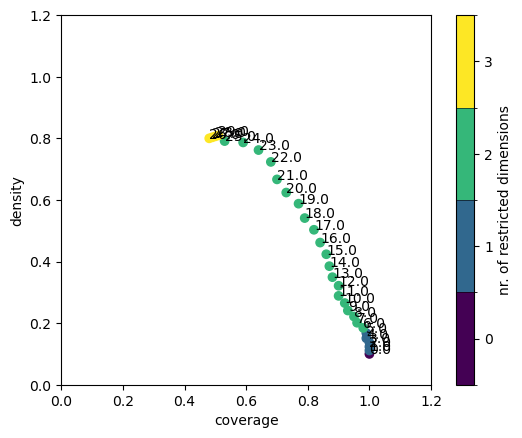

In [ ]:
from ema_workbench.analysis import prim

#define an x with the data from the experiments (the uncertainties we want to search on)
x=prim_df.loc[:][['chapala_flow', 'calderon_lared_flow','pozos_flow', 'toluquilla_flow',]]

quantile=0.9
variable_of_interest = "supplied_demand_GINI"
prim_df["scenario_of_interest"] = prim_df[variable_of_interest] > prim_df[variable_of_interest].quantile(quantile)

values_of_interest = prim_df.loc[:]["scenario_of_interest"]

#define a y with the variable of interest and convert it to a 1D array with values
y = values_of_interest.values



ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.5, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


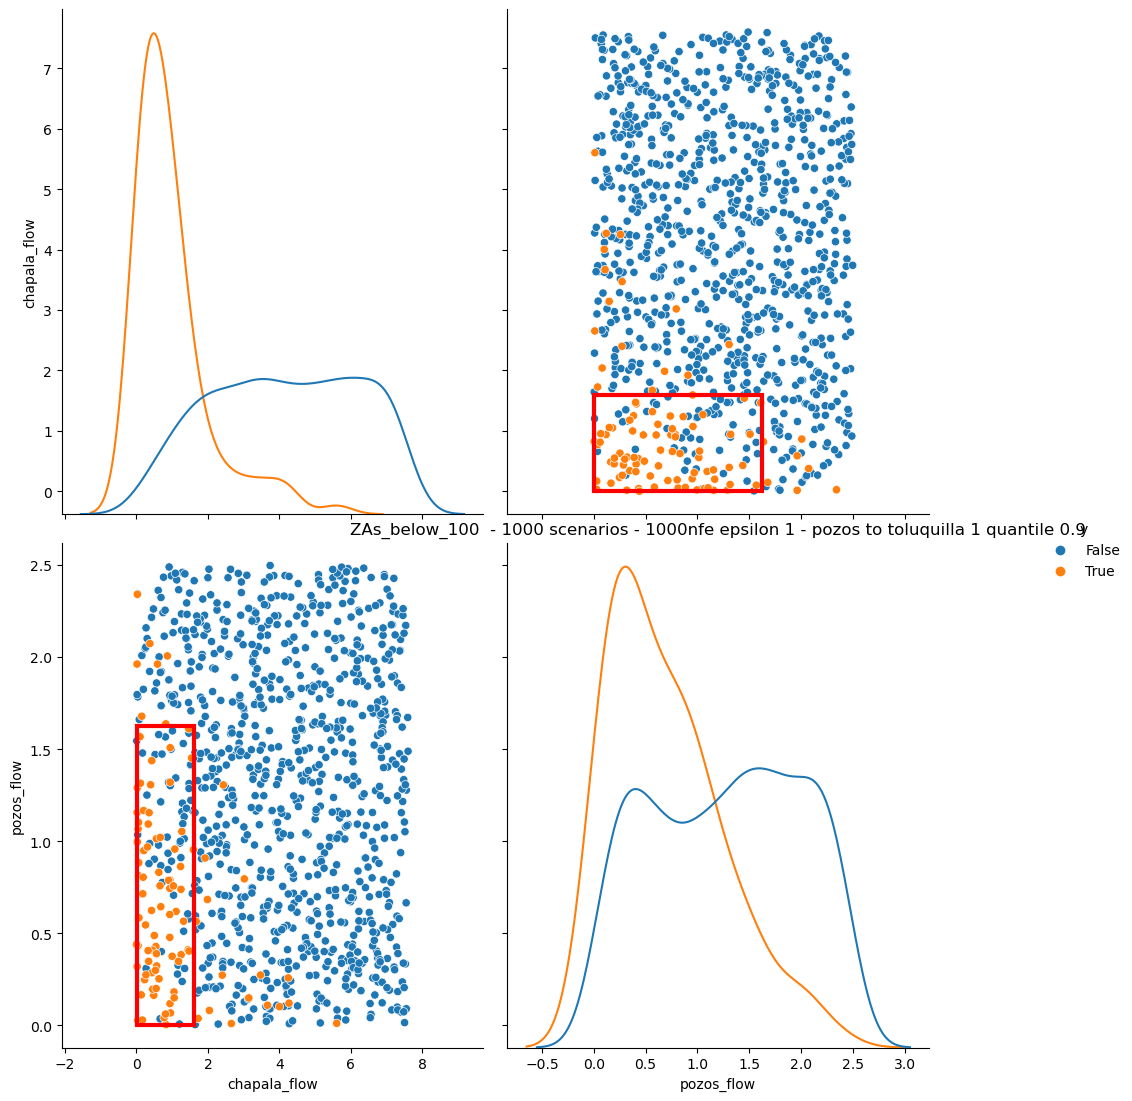

In [ ]:
point = 19


import plotly.express as px
from itertools import cycle

box1.select(point)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title(f"{experiment_name} quantile {quantile}")
plt.savefig(f"experiment_results/{experiment_name} quantile {quantile} PRIM ranges.jpg")
plt.show()



coverage     0.770000
density      0.587786
id          19.000000
mass         0.131000
mean         0.587786
res_dim      2.000000
Name: 19, dtype: float64

                box 19                                 
                   min       max qp value      qp value
chapala_flow  0.000714  1.596561      NaN  1.371877e-32
pozos_flow    0.003663  1.623990      NaN  1.200214e-04



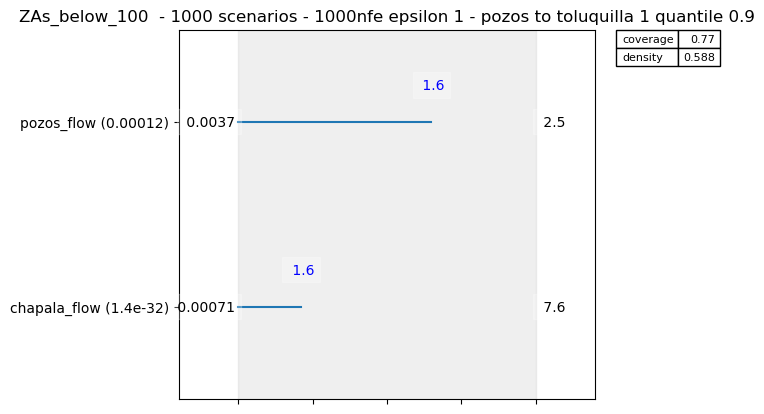

In [ ]:
box1.inspect(point)
box1.inspect(point, style='graph')
plt.title(f"{experiment_name} quantile {quantile}")
plt.savefig(f"experiment_results/{experiment_name} quantile {quantile} PRIM box.jpg")
plt.show()



plt.show()

In [ ]:
#define a dataframe with the range of chapala flow that 
#there's risk of not being able to meet the sufficientarian principle
chapala_risk_range = full_df.loc[full_df["ZAs_below_50"]>0][:]
chapala_risk_min_value = chapala_risk_range["chapala_flow"].max()
print(chapala_risk_min_value)
subspace_under50_risk = full_df.loc[full_df["chapala_flow"]<chapala_risk_min_value][:]
subspace_under50_risk.head()

7.550483035158123


,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,chapala_flow,calderon_flow,zapotillo_flow,pozos_flow,toluquilla_flow,scenario,...,supply_percapita_Toluquilla,supply_percapita_Pozos,min_supplied_demand,supplied_demand_GINI,ZAs_below_128,ZAs_below_100,ZAs_below_50,scenario,experiment,scenario_of_interest
0,-0.010080,-0.461067,-0.356174,-0.184345,4.252350,0.960307,0.329354,0.304787,0.861636,113504.0,...,125.0,5.0,0.03566,0.267428,4.0,1.0,1.0,113504.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
1,-0.973234,-0.543003,-0.173898,-0.406425,2.127411,0.575665,0.865325,1.394283,0.346133,172599.0,...,136.0,105.0,0.09686,0.212388,3.0,1.0,1.0,172599.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
2,-0.374521,0.070146,0.036557,-0.796034,5.825276,0.820116,0.381042,0.557090,0.926341,142217.0,...,120.0,100.0,0.68554,0.042231,4.0,0.0,0.0,142217.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
3,-0.588468,0.001359,0.259686,-0.188161,5.887937,0.674427,0.658394,1.084134,0.045184,197650.0,...,122.0,103.0,0.69980,0.047998,3.0,0.0,0.0,197650.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
4,-0.423577,-0.611487,0.336512,-0.175296,6.350443,1.169877,0.704051,1.032403,0.329324,199120.0,...,141.0,104.0,0.68977,0.157048,2.0,0.0,0.0,199120.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False


[MainProcess/INFO] 996 points remaining, containing 429 cases of interest
[MainProcess/INFO] mean: 0.9952153110047847, mass: 0.20983935742971888, coverage: 0.48484848484848486, density: 0.9952153110047847 restricted_dimensions: 3


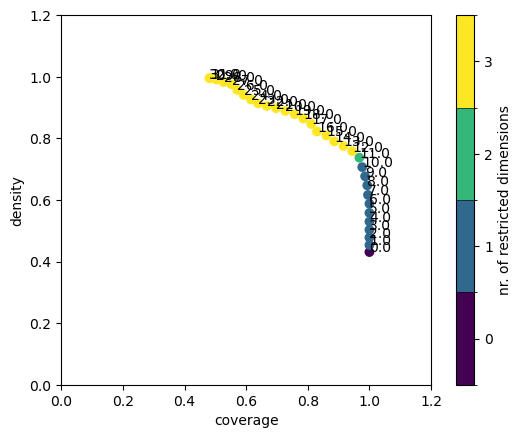

In [ ]:
#define an x with the data from the experiments (the uncertainties we want to search on)
prim_df=subspace_under50_risk
x=prim_df.loc[:][['chapala_flow', 'calderon_lared_flow',
       'pozos_flow', 'toluquilla_flow',]]

variable_of_interest = "ZAs_below_50"
true_is = 0
false_is = [1,2,3,4,5]

values_of_interest = prim_df.loc[:][variable_of_interest].replace([true_is,false_is],[True, False])

#define a y with the variable of interest and convert it to a 1D array with values
y = values_of_interest.values



ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
point=11
box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


,reproduce coverage,reproduce density
chapala_flow,100.0,100.0
pozos_flow,80.0,60.0
calderon_flow,10.0,10.0
zapotillo_flow,0.0,0.0
toluquilla_flow,0.0,0.0


c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


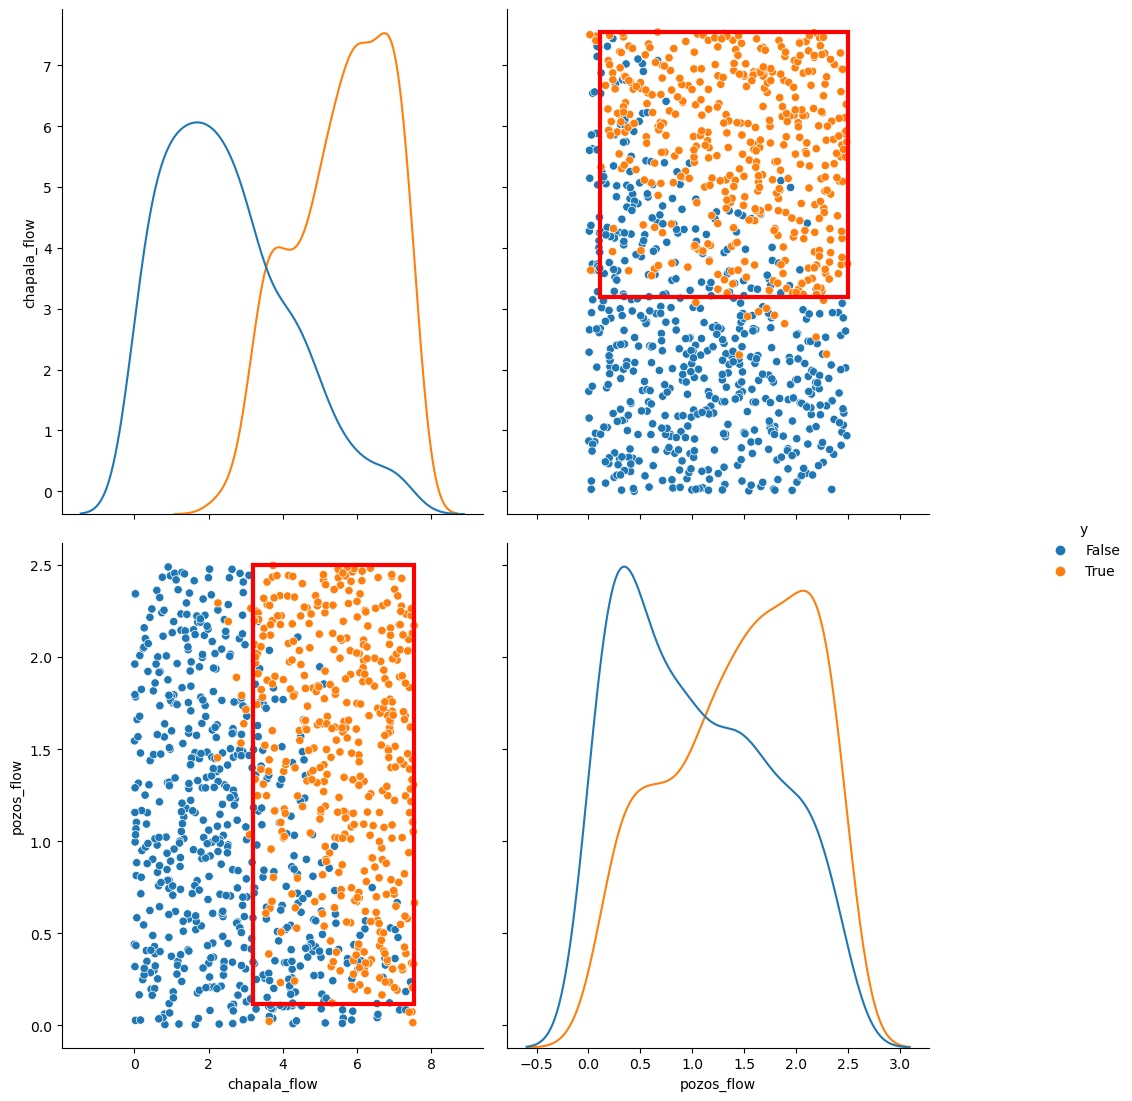

coverage     0.967366
density      0.737123
id          11.000000
mass         0.565261
mean         0.737123
res_dim      2.000000
Name: 11, dtype: float64

                box 11                                 
                   min       max      qp value qp value
chapala_flow  3.197987  7.545618  4.149981e-44      NaN
pozos_flow    0.113588  2.497648  5.997329e-02      NaN



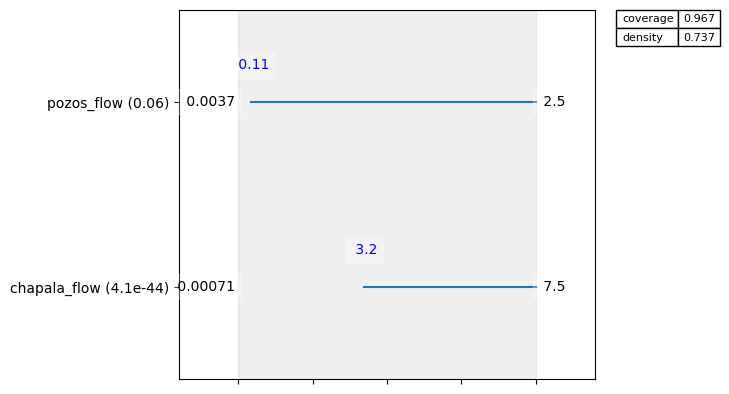

In [ ]:

import plotly.express as px
from itertools import cycle

box1.select(point)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

box1.inspect(point)
box1.inspect(point, style='graph')
plt.show()

In [ ]:
from ema_workbench.analysis import dimensional_stacking
#dimensional_stacking.create_pivot_plot(scenarios_data, y, nbins=4)

### For the case with the restriction

In [ ]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)


#loading the results from the 50l/day/person 1000 scenarios with restriction optimization
prim_df = pd.read_csv("experiment_results\ZAs_below_50  - 1000 scenarios - 1000nfe epsilon 1 - pozos to toluquilla 0.csv", index_col = [0])
all_columns = prim_df.columns
print(all_columns)

Index(['aqp4_Toluquilla_to_PP1', 'aqp1_PP2_to_PP3', 'aqp2_PP3_to_Pozos',
       'aqp3_Pozos_to_Toluquilla', 'chapala_flow', 'calderon_flow',
       'zapotillo_flow', 'pozos_flow', 'toluquilla_flow', 'scenario',
       'delivered_PP1', 'delivered_PP2', 'delivered_PP3',
       'delivered_Toluquilla', 'delivered_Pozos', 'supplied_PP1',
       'supplied_PP2', 'supplied_PP3', 'supplied_Toluquilla', 'supplied_Pozos',
       'total_supplied', 'demand_PP1', 'demand_PP2', 'demand_PP3',
       'demand_Toluquilla', 'demand_Pozos', 'supplied_demand_PP1',
       'supplied_demand_PP2', 'supplied_demand_PP3',
       'supplied_demand_Toluquilla', 'supplied_demand_Pozos',
       'supplied_demand_deficit_PP1', 'supplied_demand_deficit_PP2',
       'supplied_demand_deficit_PP3', 'supplied_demand_deficit_Toluquilla',
       'supplied_demand_deficit_Pozos', 'supply_percapita_PP1',
       'supply_percapita_PP2', 'supply_percapita_PP3',
       'supply_percapita_Toluquilla', 'supply_percapita_Pozos',
       '

[MainProcess/INFO] 1000 points remaining, containing 756 cases of interest


[MainProcess/INFO] mean: 1.0, mass: 0.661, coverage: 0.8743386243386243, density: 1.0 restricted_dimensions: 1


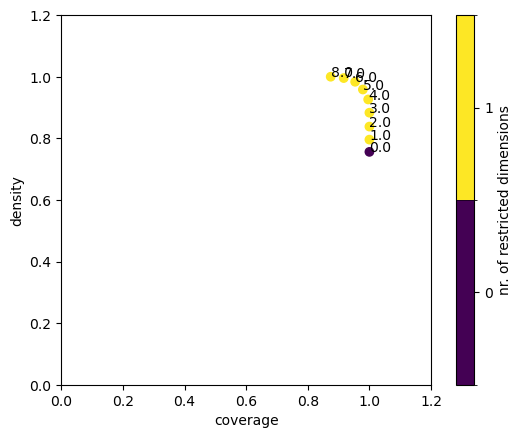

In [ ]:
from ema_workbench.analysis import prim

#define an x with the data from the experiments (the uncertainties we want to search on)
x=prim_df.loc[:][['chapala_flow', 'calderon_lared_flow',
       'pozos_flow', 'toluquilla_flow',]]

variable_of_interest = "ZAs_below_50"
true_is = 0
false_is = [1,2,3,4,5]

values_of_interest = prim_df.loc[:][variable_of_interest].replace([true_is,false_is],[True, False])

#define a y with the variable of interest and convert it to a 1D array with values
y = values_of_interest.values



ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.5, peel_alpha=0.05)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

coverage    0.874339
density     1.000000
id          8.000000
mass        0.661000
mean        1.000000
res_dim     1.000000
Name: 8, dtype: float64

                 box 8                                
                   min      max      qp value qp value
chapala_flow  2.669659  7.59904  5.045530e-81      NaN



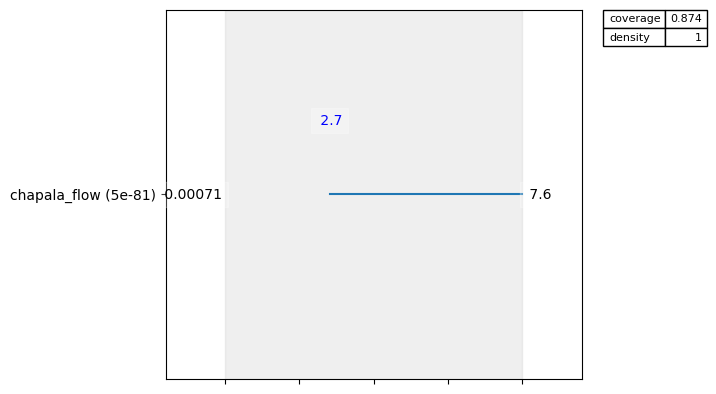

In [ ]:
point = 8

box1.inspect(point)
box1.inspect(point, style='graph')
plt.show()

In [ ]:
#define a dataframe with the range of chapala flow that 
#there's risk of not being able to meet the sufficientarian principle
chapala_risk_range = full_df.loc[full_df["ZAs_below_50"]>0][:]
chapala_risk_min_value = chapala_risk_range["chapala_flow"].max()
print(chapala_risk_min_value)
subspace_under50_risk = full_df.loc[full_df["chapala_flow"]<chapala_risk_min_value][:]
subspace_under50_risk.head()

7.550483035158123


,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,chapala_flow,calderon_flow,zapotillo_flow,pozos_flow,toluquilla_flow,scenario,...,supply_percapita_Toluquilla,supply_percapita_Pozos,min_supplied_demand,supplied_demand_GINI,ZAs_below_128,ZAs_below_100,ZAs_below_50,scenario,experiment,scenario_of_interest
0,-0.010080,-0.461067,-0.356174,-0.184345,4.252350,0.960307,0.329354,0.304787,0.861636,113504.0,...,125.0,5.0,0.03566,0.267428,4.0,1.0,1.0,113504.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
1,-0.973234,-0.543003,-0.173898,-0.406425,2.127411,0.575665,0.865325,1.394283,0.346133,172599.0,...,136.0,105.0,0.09686,0.212388,3.0,1.0,1.0,172599.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
2,-0.374521,0.070146,0.036557,-0.796034,5.825276,0.820116,0.381042,0.557090,0.926341,142217.0,...,120.0,100.0,0.68554,0.042231,4.0,0.0,0.0,142217.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
3,-0.588468,0.001359,0.259686,-0.188161,5.887937,0.674427,0.658394,1.084134,0.045184,197650.0,...,122.0,103.0,0.69980,0.047998,3.0,0.0,0.0,197650.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False
4,-0.423577,-0.611487,0.336512,-0.175296,6.350443,1.169877,0.704051,1.032403,0.329324,199120.0,...,141.0,104.0,0.68977,0.157048,2.0,0.0,0.0,199120.0,ZAs_below_100 - 1000 scenarios - 1000nfe epsi...,False


[MainProcess/INFO] 996 points remaining, containing 429 cases of interest
[MainProcess/INFO] mean: 0.9952153110047847, mass: 0.20983935742971888, coverage: 0.48484848484848486, density: 0.9952153110047847 restricted_dimensions: 3


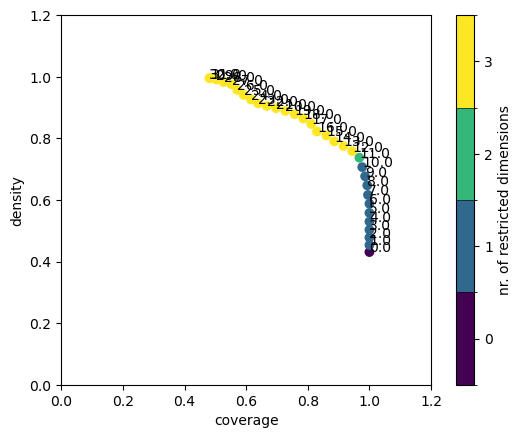

In [ ]:
#define an x with the data from the experiments (the uncertainties we want to search on)
prim_df=subspace_under50_risk
x=prim_df.loc[:][['chapala_flow', 'calderon_lared_flow',
       'pozos_flow', 'toluquilla_flow',]]

variable_of_interest = "ZAs_below_50"
true_is = 0
false_is = [1,2,3,4,5]

values_of_interest = prim_df.loc[:][variable_of_interest].replace([true_is,false_is],[True, False])

#define a y with the variable of interest and convert it to a 1D array with values
y = values_of_interest.values



ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.05)
box1 = prim_alg.find_box()
box1.show_tradeoff(annotated=True)
plt.show()

In [ ]:
point=26
box1.resample(point)

[MainProcess/INFO] resample 0
[MainProcess/INFO] resample 1
[MainProcess/INFO] resample 2
[MainProcess/INFO] resample 3
[MainProcess/INFO] resample 4
[MainProcess/INFO] resample 5
[MainProcess/INFO] resample 6
[MainProcess/INFO] resample 7
[MainProcess/INFO] resample 8
[MainProcess/INFO] resample 9


,reproduce coverage,reproduce density
chapala_flow,100.0,100.0
pozos_flow,100.0,100.0
calderon_flow,90.0,90.0
zapotillo_flow,10.0,20.0
toluquilla_flow,10.0,10.0


c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


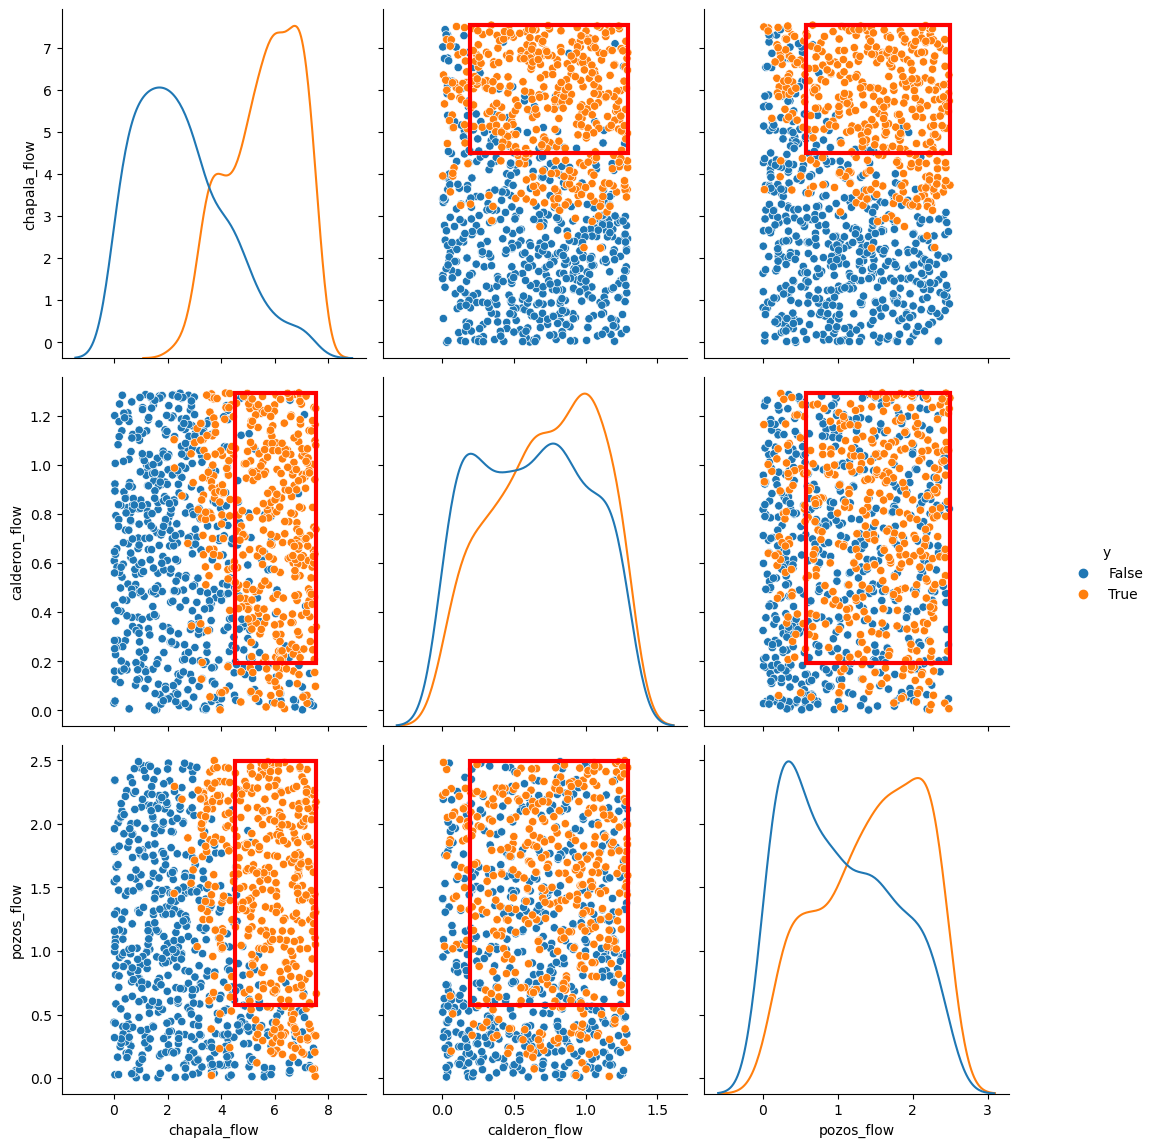

coverage     0.571096
density      0.957031
id          26.000000
mass         0.257028
mean         0.957031
res_dim      3.000000
Name: 26, dtype: float64

                 box 26                                 
                    min       max      qp value qp value
chapala_flow   4.508039  7.545618  4.401762e-57      NaN
pozos_flow     0.578587  2.497648  1.204080e-07      NaN
calderon_flow  0.192436  1.293210  3.900289e-02      NaN



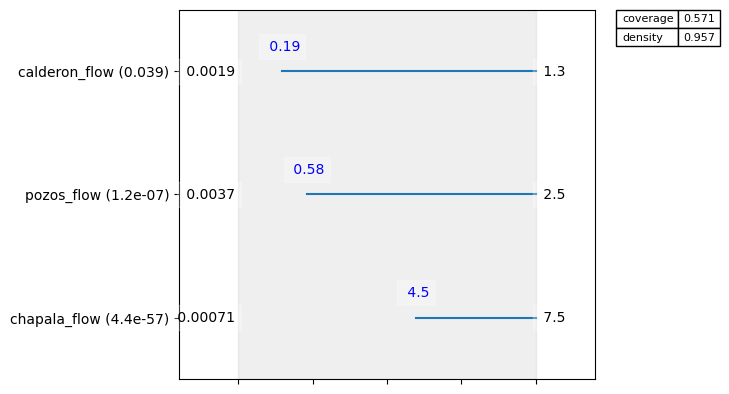

In [ ]:

import plotly.express as px
from itertools import cycle

box1.select(point)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

box1.inspect(point)
box1.inspect(point, style='graph')
plt.show()